In [1]:
import pandas as pd

In [10]:
obs_file = "https://github.com/spiros/nkua-health-data-science/raw/master/data/dest/observations.csv.gz"
loinc_file = "https://github.com/spiros/nkua-health-data-science/raw/master/data/dest/dictionary_loinc.csv"
df_obs = pd.read_csv(obs_file)
df_loinc = pd.read_csv(loinc_file)

In [12]:
df_obs.head(3)

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,VALUE,UNITS,TYPE
0,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,8302-2,51.4,cm,numeric
1,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,72514-3,1.0,{score},numeric
2,2019-02-17T05:07:38Z,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,29463-7,3.8,kg,numeric


In [13]:
df_loinc.head(3)

,CODE,DESCRIPTION
0,8302-2,Body Height
1,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...
2,29463-7,Body Weight


In [16]:
print(df_obs.shape)
print(df_loinc.shape)

(531144, 8)
(256, 2)


In [14]:
df_obs.dtypes

DATE         object
PATIENT      object
ENCOUNTER    object
CATEGORY     object
CODE         object
VALUE        object
UNITS        object
TYPE         object
dtype: object

In [15]:
df_obs['DATE'] = pd.to_datetime(df_obs['DATE'])

In [17]:
df_obs.PATIENT.nunique()

1163

In [18]:
df_obs.CODE.nunique()

233

In [23]:
print(df_obs[df_obs['CODE'].isna()].shape)
print(df_obs[df_obs['CODE'].isna()].PATIENT.nunique())

(724, 8)
19


In [25]:
df_obs = df_obs.merge(
    df_loinc,
    how='left',
    left_on='CODE',
    right_on='CODE',
    indicator=True
)

In [26]:
df_obs._merge.value_counts()

_merge
both          541996
left_only      32560
right_only         0
Name: count, dtype: int64

In [28]:
df_obs[df_obs['_merge']=='left_only'].CODE.value_counts(dropna=False)

CODE
-7                31732
NaN                 724
2833710--05010      104
Name: count, dtype: int64

In [33]:
df_obs.drop(df_obs[df_obs['_merge']=='left_only'].index, inplace=True)

In [36]:
# Display the top ten most common laboratory measurements.
g = ['CODE', 'DESCRIPTION']
df_obs.groupby(g).size().reset_index(name='count').sort_values('count', ascending=False).head(25)

,CODE,DESCRIPTION,count
171,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,14514
201,8462-4,Diastolic Blood Pressure,14444
203,8480-6,Systolic Blood Pressure,14444
67,29463-7,Body Weight,13252
228,9279-1,Respiratory rate,12991
215,8867-4,Heart rate,12991
199,8302-2,Body Height,12676
170,72166-2,Tobacco smoking status NHIS,12643
92,39156-5,Body Mass Index,11549
167,71802-3,Housing status,8929


In [37]:
df_obs.groupby(g).size().reset_index(name='count').sort_values('count', ascending=False).tail(10)

,CODE,DESCRIPTION,count
55,26464-8,White Blood Cell (Elevated),4
1,10480-2,Estrogen+Progesterone receptor Ag [Presence] i...,4
94,42719-5,Total Bilirubin (Elevated),4
210,85352-3,Lymph nodes with isolated tumor cells [#] in C...,3
43,21924-6,Tumor marker Cancer,2
93,417181009,Estrogen+Progesterone receptor Ag [Presence] i...,2
208,85343-2,Lymph nodes with macrometastases [#] in Cancer...,2
209,85344-0,Lymph nodes with micrometastases [#] in Cancer...,2
71,3016-3,Thyrotropin [Units/volume] in Serum or Plasma,1
72,3024-7,Thyroxine (T4) free [Mass/volume] in Serum or ...,1


In [40]:
diastolic_code = '8480-6'
systolic_code = '8462-4'

m = (df_obs['CODE']==diastolic_code)|(df_obs['CODE']==systolic_code)
df_bp = df_obs[m].copy()
df_bp.shape


(28888, 10)

In [41]:
df_bp.head(3)

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,VALUE,UNITS,TYPE,DESCRIPTION,_merge
5,2019-02-17 05:07:38+00:00,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,8462-4,89.0,mm[Hg],numeric,Diastolic Blood Pressure,both
6,2019-02-17 05:07:38+00:00,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,748f8357-6cc7-551d-f31a-32fa2cf84126,vital-signs,8480-6,115.0,mm[Hg],numeric,Systolic Blood Pressure,both
30,2019-03-24 05:07:38+00:00,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,5a4735ae-423f-6563-28ab-b3d11b49b2d4,vital-signs,8462-4,71.0,mm[Hg],numeric,Diastolic Blood Pressure,both


In [42]:
df_bp['VALUE'] = df_bp['VALUE'].astype(float)

<AxesSubplot:ylabel='Frequency'>

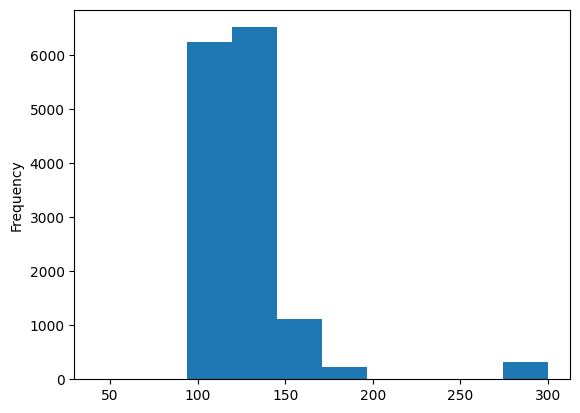

In [44]:
df_bp[df_bp['DESCRIPTION']=='Systolic Blood Pressure'].VALUE.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

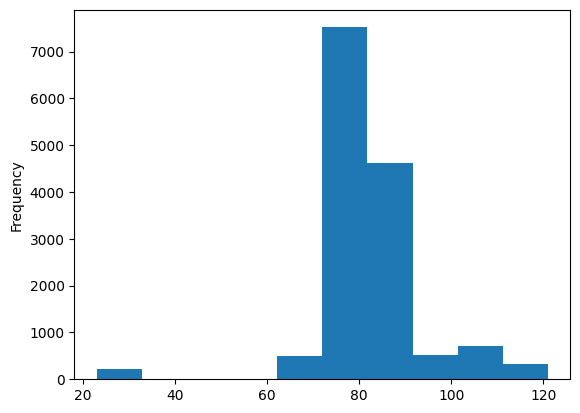

In [43]:
df_bp[df_bp['DESCRIPTION']=='Diastolic Blood Pressure'].VALUE.plot(kind='hist')

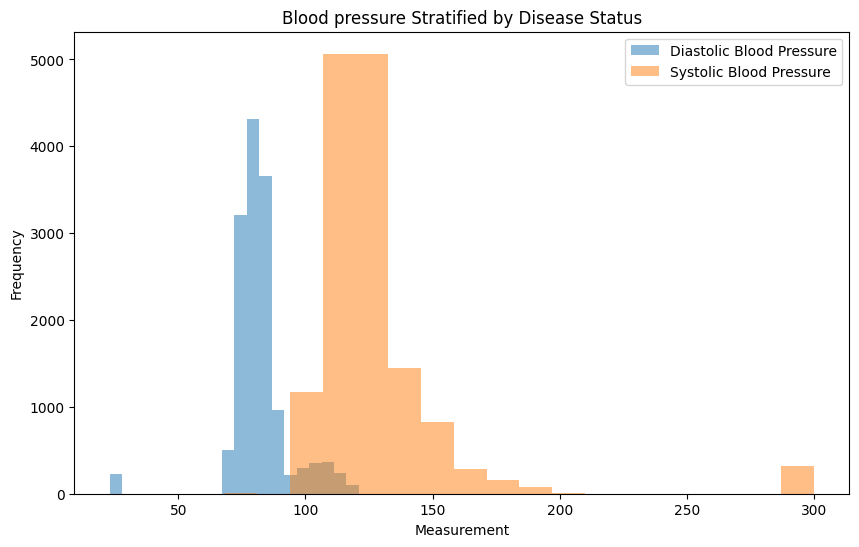

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for status, group in df_bp.groupby('DESCRIPTION'):
    group['VALUE'].plot(kind='hist', alpha=0.5, label=status, bins=20, stacked=True)

plt.legend()
plt.title('Blood pressure Stratified by Disease Status')
plt.xlabel('Measurement')  # or another relevant label for the x-axis
plt.ylabel('Frequency')
plt.show()

In [50]:
m = (df_bp['DESCRIPTION']=='Systolic Blood Pressure')&(df_bp['VALUE']>220)
df_bp.drop(df_bp[m].index, inplace=True)
m = (df_bp['DESCRIPTION']=='Diastolic Blood Pressure')&(df_bp['VALUE']<30)
df_bp.drop(df_bp[m].index, inplace=True)

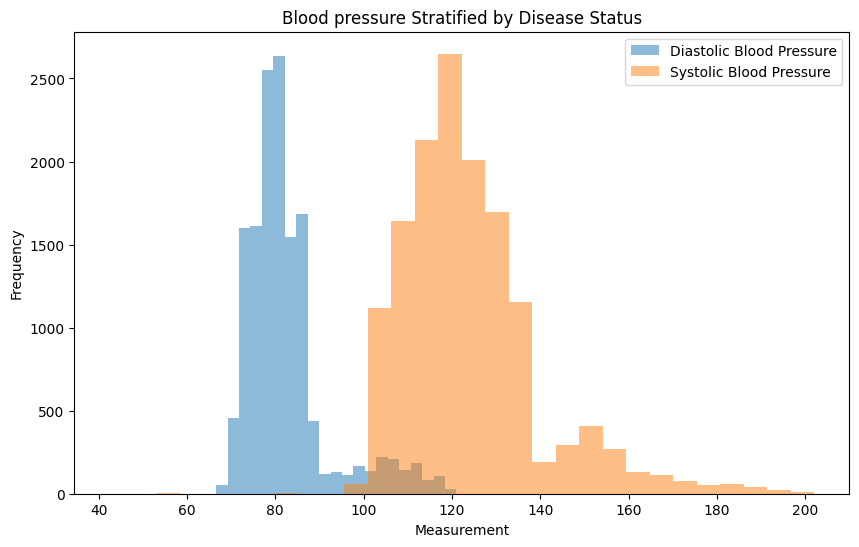

In [54]:
plt.figure(figsize=(10, 6))

for status, group in df_bp.groupby('DESCRIPTION'):
    group['VALUE'].plot(kind='hist', alpha=0.5, label=status, bins=30, stacked=True)

plt.legend()
plt.title('Blood pressure Stratified by Disease Status')
plt.xlabel('Measurement')  # or another relevant label for the x-axis
plt.ylabel('Frequency')
plt.show()